In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

In [2]:
data = pd.read_csv(r'C:\Users\UmarFarooque\Desktop\Referance of datascience\Files-88c1e66e44028787bc8a5efb63052f117700cbcf\Admission_Prediction.csv')
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   
2           3        NaN        104.0                3.0  3.0  3.5  8.00   
3           4      322.0        110.0                3.0  3.5  2.5  8.67   
4           5      314.0        103.0                2.0  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [3]:
data.describe()   #OBSERVE MEAN WITH STD (103,11),COUNT SHOULD BE SAME AS 500

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  485.000000   490.000000         485.000000  500.000000   
mean   250.500000  316.558763   107.187755           3.121649    3.374000   
std    144.481833   11.274704     6.112899           1.146160    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

In [4]:
data.shape

(500, 9)

In [5]:
#FILL NULL VALUES #if categorical data then use mode otherwise use mean

In [6]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [7]:
#varifying the nan values

In [8]:
data.describe()    #observe every where 500

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.558763   107.187755           3.118000    3.374000   
std    144.481833   11.103952     6.051338           1.128993    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  309.000000   103.000000           2.000000    2.500000   
50%    250.500000  316.558763   107.000000           3.000000    3.500000   
75%    375.250000  324.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

In [9]:
# Dropping unwanted columns

In [10]:
data = data.drop(columns=['Serial No.'])
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0  337.000000        118.0                4.0  4.5  4.5  9.65         1   
1  324.000000        107.0                4.0  4.0  4.5  8.87         1   
2  316.558763        104.0                3.0  3.0  3.5  8.00         1   
3  322.000000        110.0                3.0  3.5  2.5  8.67         1   
4  314.000000        103.0                2.0  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

In [11]:
#DIVIDE DATASET INTO FEATURES AND LABEL

In [12]:
y = data['Chance of Admit']
x = data.drop(columns = ['Chance of Admit'])

In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [14]:
x

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0    337.000000        118.0                4.0  4.5  4.5  9.65         1
1    324.000000        107.0                4.0  4.0  4.5  8.87         1
2    316.558763        104.0                3.0  3.0  3.5  8.00         1
3    322.000000        110.0                3.0  3.5  2.5  8.67         1
4    314.000000        103.0                2.0  2.0  3.0  8.21         0
..          ...          ...                ...  ...  ...   ...       ...
495  332.000000        108.0                5.0  4.5  4.0  9.02         1
496  337.000000        117.0                5.0  5.0  5.0  9.87         1
497  330.000000        120.0                5.0  4.5  5.0  9.56         1
498  312.000000        103.0                4.0  4.0  5.0  8.43         0
499  327.000000        113.0                4.0  4.5  4.5  9.04         0

[500 rows x 7 columns]

In [15]:
#VISUALIZING RELATIONSHIP

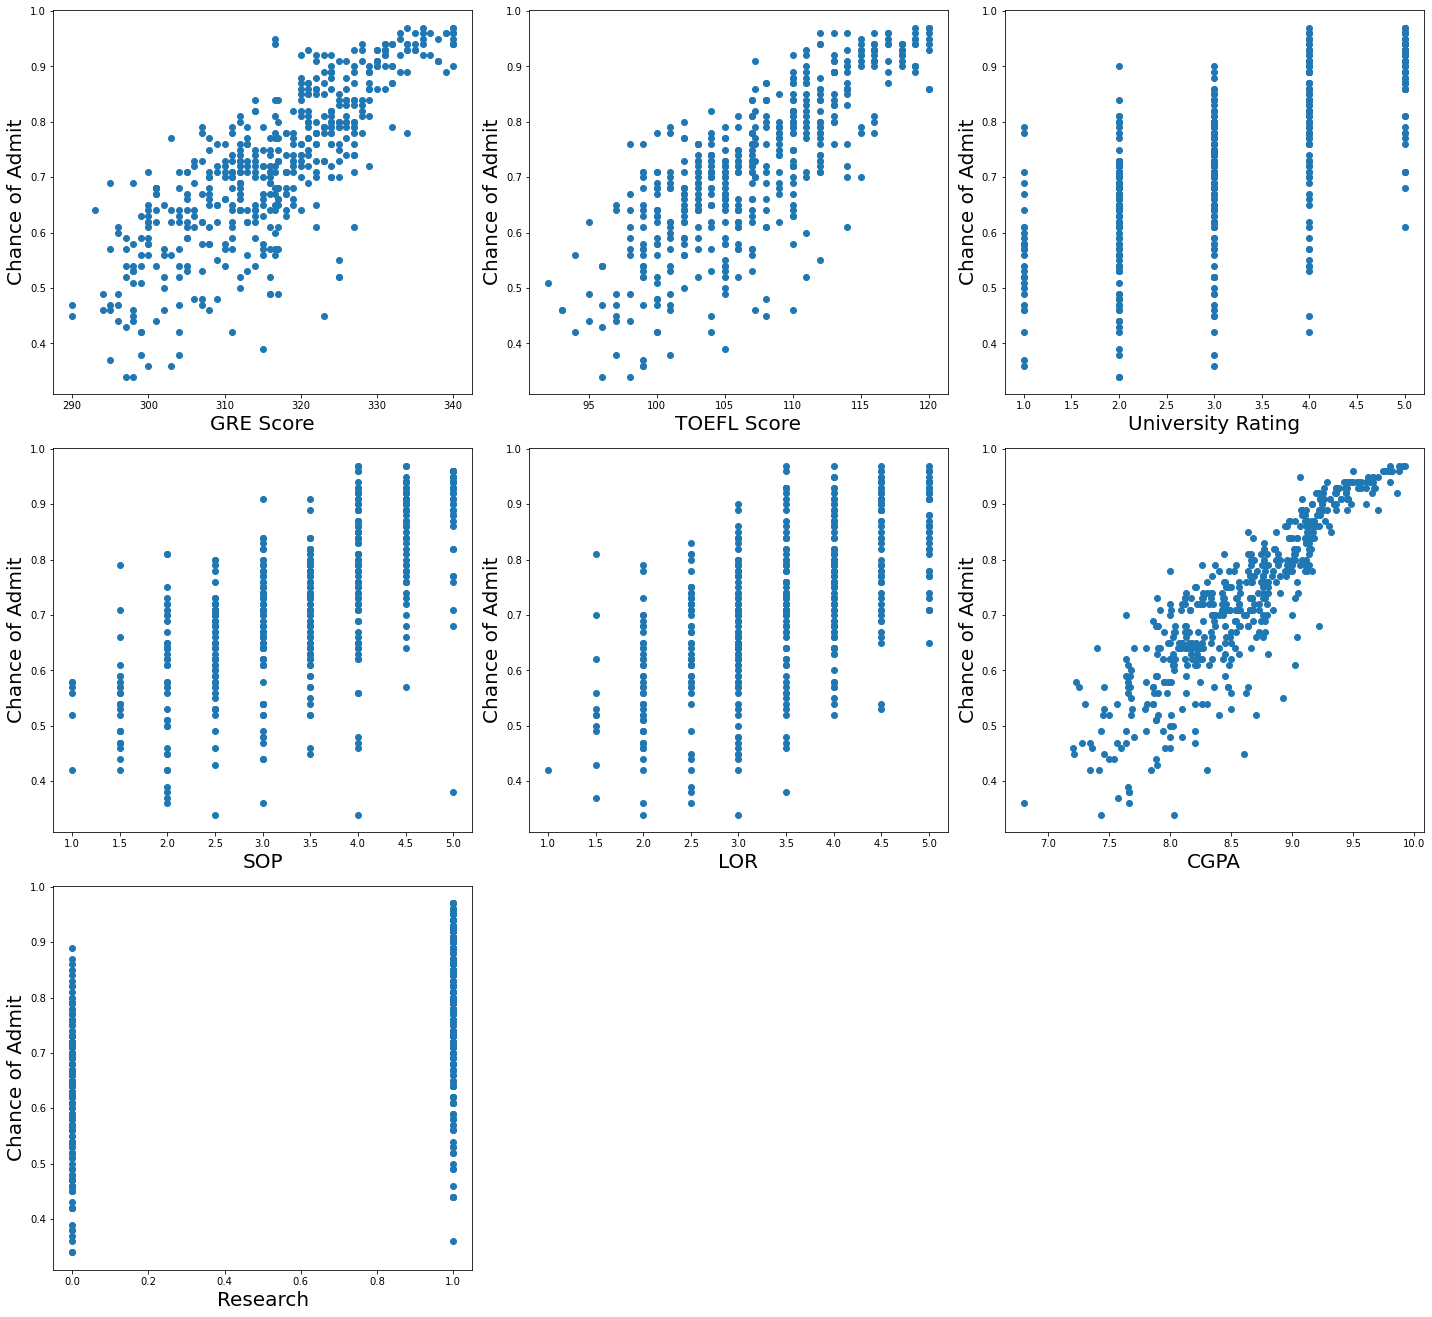

In [16]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
        plotnumber+=1
        plt.tight_layout()

In [17]:
#DATA SCALING .FORMULA Z=(X-MEAN)/STD
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x.values)

In [18]:
#HOW DOES X_SCALED DATA LOOKS LIKE

In [19]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

SPLIT DATA INTO TRAIN AND TEST MODEL WILL BE BUILT ON TRAINING DATA AND TESTING ON TEST DATA

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=21) #here 0.25 is test data for25% AND RANDOM SATATE IS RANDOMNESS THROUGHT DATA IS CONSTANT

In [21]:
y_train.head()


410    0.54
242    0.70
191    0.87
320    0.75
333    0.71
Name: Chance of Admit, dtype: float64

MODEL INITIATING AND TRAINING

In [22]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
#PREDICT THE CHANCE OF ADMISSION GIVEN FEATURES

In [24]:
data.tail(2)

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
498      312.0        103.0                4.0  4.0  5.0  8.43         0   
499      327.0        113.0                4.0  4.5  4.5  9.04         0   

     Chance of Admit  
498             0.73  
499             0.84

In [25]:
print('Chance of Admission is :',regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))) #here u can see ur model % and data % like we did here as for499

Chance of Admission is : [0.82735265]


#YOU CAN SAVE THE MODEL LATER YOU CONVERT IT FOR PREDICTION
#SAVING THE MODEL TO THE LOCAL SYSTEM           

In [26]:
filename = 'finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

#PREDICTION USING SAVED MODEL

loaded_model = pickle.load(open(filename,'rb'))

a = loaded_model.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]]))
a

array([0.70571294])

#ADUSTED RSQUARE

In [27]:
regression.score(x_train,y_train)

0.8345265440873477

#LETS CHEAK HOW MODEL IS WELL FIT INTO TEST DATA

In [28]:
regression.score(x_test,y_test)

0.7721138044194555

#LETS PLOT AND VISUALIZE

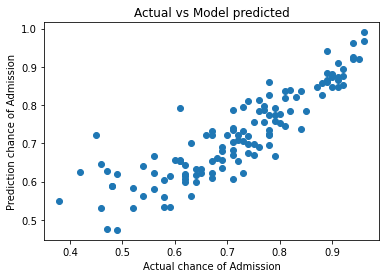

In [29]:
y_pred  = regression.predict(x_test)
y_pred
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of Admission')
plt.ylabel('Prediction chance of Admission')
plt.title('Actual vs Model predicted')
plt.show()

#MODEL EVALUATION

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [31]:
y_pred = regression.predict(x_test)


In [32]:


mean_absolute_error(y_test,y_pred)


0.04735267763298541

In [33]:
mean_squared_error(y_test,y_pred)

0.004243329928480493

In [34]:

np.sqrt(mean_squared_error(y_test,y_pred))

0.06514084685111557

#IF ANY OVERFITTING(REPEATED VALUES) IN MODEL

REGULARIZATION

In [35]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#LASSO REGRESSION

In [36]:
#lassoCV will return best alpha after max iteration
#Normalize is subtracting the mean and dividing by L2 form 

In [37]:
lassCV = LassoCV(alphas=None,max_iter=1000,normalize=True)
lassCV.fit(x_train,y_train)

LassoCV(normalize=True)

In [38]:
#best alpha parameter
alpha = lassCV.alpha_          #learning rate finding
alpha

6.555600289520519e-06

In [39]:
#now we have the best parameter ,lets go to use Lasso regression & see how well our data has fitted before

In [40]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.555600289520519e-06)

In [41]:
lasso_reg.score(x_test,y_test)

0.7721078520130567

In [42]:
#there is no much differace between the real model evaluation and lasso so there is no overfitting here

USING RIDGE REGRESSION MODEL

In [43]:
#RIDGE CV WILL RETURN BEST ALPHA AND COEFFICIENT AFTER PERFORMING 10CROSS VALIDATION

In [44]:
ridgeCV = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgeCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [45]:
ridgeCV.alpha_

0.011

In [46]:
ridge_model = Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [47]:
ridge_model.score(x_test,y_test)

0.7721113933458978

In [ ]:
#again we got same as previous so we are concluding theat we dont have overfitting module